<a href="https://colab.research.google.com/github/sobiya1234/Machine-Learning/blob/main/ML_Assignment_2_Data_Pre_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csvfile= 'https://raw.githubusercontent.com/sobiya1234/Diabetes/refs/heads/main/diabetes.csv'
df=pd.read_csv(csvfile)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [ ]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


1. Data Cleaning:


1.1. Rename Columns: Update column names such as 'ID' to 'Visit_ID' and 'No_Pation' to 'Patient_ID' to make them more descriptive and clear.

In [ ]:
# Rename specified columns
df.rename(columns={'ID': 'Visit_ID', 'No_Pation': 'Patient_ID'}, inplace=True)

# Display updated column names to confirm changes
df.columns

Index(['Visit_ID', 'Patient_ID', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c',
       'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

1.2. Check Unique Values in Categorical Columns: Identify the unique values in categorical columns: Gender: F (Female) & M (Male), CLASS: N (No diabetes), P (Pre-diabetes), Y (Yes, Diabetes). Review and correct any unexpected or incorrect values if necessary.

In [ ]:
# Check unique values in 'Gender' and 'CLASS' columns
print("Gender Unique:", df['Gender'].unique())
print("CLASS Unique:", df['CLASS'].unique())


Gender Unique: ['F' 'M' nan 'f']
CLASS Unique: ['N' 'N ' 'P' 'Y' 'Y ']


In [ ]:
# Standardize 'Gender' and 'CLASS'
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male', 'f': 'Female', 'nan': 'Unknown'})
df['CLASS'] = df['CLASS'].replace({'N': 'No diabetes', 'N ': 'No diabetes', 'P': 'Pre-diabetes', 'Y': 'Yes Diabetes', 'Y ': 'Yes Diabetes'})
print("Gender Unique:", df['Gender'].unique())
print("CLASS Unique:", df['CLASS'].unique())

Gender Unique: ['Female' 'Male' nan]
CLASS Unique: ['No diabetes' 'Pre-diabetes' 'Yes Diabetes']


In [ ]:
numerical_columns=df.select_dtypes(include=np.number).columns
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Visit_ID,1009.0,338.166501,2.394796e+02,1.0,126.0,294.0,547.000,800.00
Patient_ID,1009.0,271746.778989,3.365681e+06,123.0,24064.0,34399.0,45391.000,75435657.00
AGE,1008.0,53.596230,8.743882e+00,25.0,51.0,55.0,59.000,79.00
Urea,1008.0,5.132979,2.930873e+00,0.5,3.7,4.6,5.700,38.90
Cr,1007.0,68.938431,5.981567e+01,6.0,48.0,60.0,73.000,800.00
HbA1c,1006.0,8.281372,2.534861e+00,0.9,6.5,8.0,10.175,16.00
Chol,1007.0,4.862483,1.298665e+00,0.0,4.0,4.8,5.600,10.30
TG,1007.0,2.346783,1.396438e+00,0.3,1.5,2.0,2.900,13.80
HDL,1008.0,1.202728,6.580379e-01,0.2,0.9,1.1,1.300,9.90
LDL,1007.0,2.611708,1.115990e+00,0.3,1.8,2.5,3.300,9.90


1.4. Box Plot of Numerical Columns: Create a box plot for all numerical columns in a single graph to visualize their distribution, range, and outliers. Explain any visible trends or outliers.

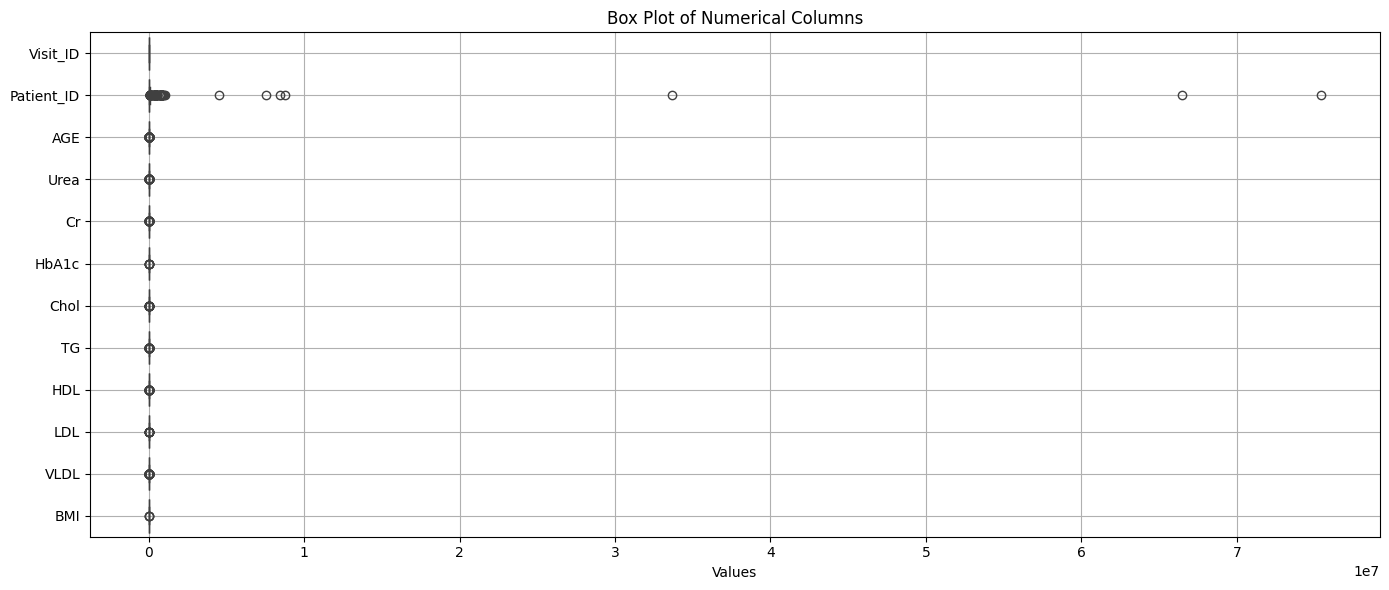

In [ ]:
numerical_df = df.select_dtypes(include='number')
plt.figure(figsize=(14, 6))
sns.boxplot(data=numerical_df, orient='h')
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()

1.5. Identify Missing (Null) Values: Determine the number of missing values in each column and report which columns have null values.

In [ ]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values:\n", missing_columns)

Missing values:
 Gender    3
AGE       1
Urea      1
Cr        2
HbA1c     3
Chol      2
TG        2
HDL       1
LDL       2
VLDL      1
dtype: int64


1.6. Impute Missing Values: Select an appropriate strategy (mean, median, or mode) to impute missing values in the dataset. Justify the imputation technique for each column. After imputation, verify that no missing values remain.

In [ ]:
df.columns

Index(['Visit_ID', 'Patient_ID', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c',
       'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [ ]:
cols_to_fil_mode=['AGE', 'Urea', 'Cr', 'HbA1c','Chol', 'TG', 'HDL', 'LDL', 'VLDL']

In [ ]:
for col in cols_to_fil_mode:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
Visit_ID,0
Patient_ID,0
Gender,3
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [ ]:
# Filter Cr (Creatinine) > 99.5th percentile
cr_threshold = df['Cr'].quantile(0.995)
df = df[df['Cr'] <= cr_threshold]

# Filter Urea > 99.9th percentile
urea_threshold = df['Urea'].quantile(0.999)
df = df[df['Urea'] <= urea_threshold]

c. Remove Extreme Outliers: For lipid-related columns (LDL, VLDL, HDL, TG, Chol), remove extreme outliers using an appropriate method such as IQR or Z-score.

In [ ]:
# Define lipid columns
lipid_cols = ['LDL', 'VLDL', 'HDL', 'TG', 'Chol']

# Remove extreme outliers using IQR method
for col in lipid_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [ ]:
print("Remaining rows after outlier handling:", df.shape)


Remaining rows after outlier handling: (816, 14)


1.8. Check for Duplicates: Identify any duplicate rows and remove them to avoid redundant data in analysis.

In [ ]:
# Check number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")

Number of duplicate rows: 7
Data shape after removing duplicates: (809, 14)


2. Data Transformation:

2.1. Feature Engineering: Apply Label Encoding or One-Hot Encoding to the categorical column Gender to convert it into numeric format for model-building purposes.

In [ ]:
#Feature Scaling & Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [ ]:
# Label Encoding for Gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [ ]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

2.2. Feature Scaling: Standardize or normalize the numerical columns that have varying scales (e.g., Patients, AGE, BMI, Cr) to ensure consistent contribution in subsequent analyses. Justify the scaling method used (standardization vs. normalization).

In [ ]:
scaler = StandardScaler()
cols_to_scale = ['Patient_ID', 'AGE', 'BMI', 'Cr']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 1 to 1004
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Visit_ID    809 non-null    int64  
 1   Patient_ID  809 non-null    float64
 2   AGE         809 non-null    float64
 3   Urea        809 non-null    float64
 4   Cr          809 non-null    float64
 5   HbA1c       809 non-null    float64
 6   Chol        809 non-null    float64
 7   TG          809 non-null    float64
 8   HDL         809 non-null    float64
 9   LDL         809 non-null    float64
 10  VLDL        809 non-null    float64
 11  BMI         809 non-null    float64
 12  CLASS       809 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 88.5+ KB
